# **STAGE PFA 2023**



# **Entreprises**: 3D SMART FACTORY

# **Sujet 13:**  Machine Learning temps réel sur flux de données

# **Domaine:**"Prévision du cours des actions de TSLA à travers l’analyse des sentiments des tweets et des articles d’actualités"




# **Équipe:**

- Adamou Hassane Yahouza,ENSIAS Rabat ,Data  Science and IOT
- BAHMAD Youssef,INSEA and Data Science
- DJAKAS Yawo Justin ,ENSIAS Rabat ,Data  Science and IOT
- HASSANINE Kenza,ENSIAS Rabat ,Data  Scienceand IOT



# **Encadrant: T. BERTIN**




#1. COLLECTE DES DONNÉES


## 1.1  COLLECTE DES COURS D'ACTIONS DE TESLA

In [ ]:
#Installer
! pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
from datetime import datetime

# Définir le ticker
tsla = "TSLA"
ActionsDF = yf.Ticker(tsla)

# Date de fin au format 'dd/mm/yyyy'
end_date= "2023-08-14"


# Recuperer les prix
ActionsDF = ActionsDF.history(period="1d", start='2010-1-1', end=end_date)

# Formater la colonne de dates dans le format "YYYY-MM-DD"
ActionsDF.index = ActionsDF.index.strftime('%Y-%m-%d')

# Enregistrer la DataFrame dans un fichier CSV
chemin_fichier_csv = '/content/drive/MyDrive/Kaggle/Actions_tsla.csv'
ActionsDF.to_csv(chemin_fichier_csv)

print(f"Fichier CSV '{chemin_fichier_csv}' créé avec succès.")


In [ ]:

ActionsDF


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2023-08-07,251.449997,253.649994,242.759995,251.449997,111097900,0.0,0.0
2023-08-08,247.449997,250.919998,245.009995,249.699997,96642200,0.0,0.0
2023-08-09,250.869995,251.100006,241.899994,242.190002,101596300,0.0,0.0


## 1.2 COLLECTE DES ARTICLES FINANCIERS

### 1.2.1 SOURCE 1(KENZA)

In [ ]:
#Importer les bibliothèques nécessaires
import pandas as pd

#Charger le fichier drive

drive_path=("/content/drive/MyDrive/Kaggle/Articles_tsla_Source_1.xlsx")
Articles_tsla_Df1=pd.read_excel(drive_path)

#Afficher les 5 premières lignes
print(Articles_tsla_Df1.shape)
Articles_tsla_Df1.head()



(2198, 3)


,Time,Title,Description
0,2023-08-09,Tesla and other top companies capitalize on bi...,"The list includes MicroStrategy, Block, Tesla ..."
1,2023-08-09,The Volvo EX30’s interior is the Ikea take on ...,Comparisons will inevitably be drawn between t...
2,2023-08-09,Tesla Owners Love Their Cars More Than Elon Mu...,(Bloomberg) -- Listen to The Big Take podcast ...
3,2023-08-09,Tesla Semis Shine on PepsiCo's Long-Haul Elect...,PepsiCo is running 21 Tesla Semis up to 450 mi...
4,2023-08-09,"Tesla Reportedly Leases Office Space In India,...","Tesla India Motor & Energy, which is the Ameri..."


### 1.2.2 Source 2(Youssef)

In [ ]:
! pip install -q newsapi-python

In [ ]:
from newsapi import NewsApiClient
import pandas as pd
import datetime as dt

newsapi = NewsApiClient(api_key='9793c712defd4e319d11fafc93c58543')

# Define the date range
start_date = dt.datetime(2023, 7, 10)  # Start from the day after authorization start date
end_date = dt.datetime.today()

# Initialize an empty list to store all articles
all_articles = []

# Iterate over days
current_date = start_date
while current_date <= end_date:
    from_date = current_date.strftime('%Y-%m-%d')
    to_date = from_date  # Get articles for the same day

    data = newsapi.get_everything(
        q="tesla",
        language='en',
        from_param=from_date,
        to=to_date,
        page=1
    )
    articles = data["articles"]
    all_articles.extend(articles)

    # Move to the next day
    current_date += dt.timedelta(days=1)

# Create a DataFrame from the list of articles
articles_df = pd.DataFrame(all_articles)

# Define the directory path on Google Drive
drive_dir = '/content/drive/MyDrive/Kaggle'
csv_filename = 'Articles_tsla_source_2.csv'

# Construct the full file path
csv_path = os.path.join(drive_dir, csv_filename)

# Save the DataFrame to a CSV file
articles_df.to_csv(csv_path, index=False)

# Print a message to confirm the save
print(f"DataFrame saved as {csv_path}")


In [ ]:
# Importer la bibliothèque Pandas
import pandas as pd

# Charger le fichier CSV depuis le chemin donné
drive_path = "/content/drive/MyDrive/Kaggle/Articles_tsla_source_2.csv"
Articles_tsla_Df2 = pd.read_csv(drive_path)

# Afficher la forme du DataFrame (nombre de lignes et de colonnes)
print(Articles_tsla_Df2.shape)

# Afficher les 5 premières lignes du DataFrame
Articles_tsla_Df2.head()


(3047, 8)


,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'google-news', 'name': 'Google News'}",NaN,Tesla builds first Cybertruck after two years ...,Tesla builds first Cybertruck after two years ...,https://consent.google.com/ml?continue=https:/...,NaN,2023-07-15T18:17:29Z,We use cookies and data to<ul><li>Deliver and ...
1,"{'id': 'google-news', 'name': 'Google News'}",NaN,"Elon Musk says xAI will examine universe, work...","Elon Musk says xAI will examine universe, work...",https://consent.google.com/ml?continue=https:/...,NaN,2023-07-15T05:32:30Z,We use cookies and data to<ul><li>Deliver and ...
2,"{'id': 'google-news', 'name': 'Google News'}",NaN,"Elon Musk says xAI will examine universe, work...","Elon Musk says xAI will examine universe, work...",https://consent.google.com/ml?continue=https:/...,NaN,2023-07-15T06:36:54Z,We use cookies and data to<ul><li>Deliver and ...
3,"{'id': 'business-insider', 'name': 'Business I...",Pete Syme,95 Tesla deaths have involved fires or Autopil...,Tesla deaths from fires and Autopilot make up ...,https://www.businessinsider.com/tesla-deaths,https://i.insider.com/649d7594ca78800019708b47...,2023-07-15T06:32:06Z,A Tesla Model Y seen outside a showroom.Getty ...
4,"{'id': 'time', 'name': 'Time'}",Associated Press,Tesla’s First Electric Pickup Has Rolled Off t...,Tesla says its first production Cybertruck ele...,https://time.com/6295006/tesla-pickup-truck/,https://api.time.com/wp-content/uploads/2023/0...,2023-07-15T18:20:09Z,Tesla says its first production Cybertruck ele...


### 1.2.3 DATASET FINAL DES ARTICLES(ADDITION DES DEUX )

In [ ]:
## Premier dataset d'articles

In [ ]:
import pandas as pd

# Charger le fichier Excel depuis le chemin donné
drive_path = "/content/drive/MyDrive/Kaggle/Articles_tsla_Source_1.xlsx"
Articles_tsla_Df1 = pd.read_excel(drive_path)

# Sélectionner et renommer les colonnes dans Articles_tsla_Df1
selected_columns = ['Time', 'Title', 'Description']

# Sélectionner les colonnes souhaitées
Articles_tsla_Df1 = Articles_tsla_Df1[selected_columns]

# Renommer les colonnes pour les rendre plus descriptives
Articles_tsla_Df1.columns = ['Date', 'Title', 'Description']

# Convertir la colonne 'Date' en datetime
Articles_tsla_Df1['Date'] = pd.to_datetime(Articles_tsla_Df1['Date'])

# Formater la colonne 'Date' en "YYYY-MM-DD" en utilisant .apply
Articles_tsla_Df1['Date'] = Articles_tsla_Df1['Date'].apply(lambda x: x.strftime('%Y-%m-%d'))

# Afficher les 5 premières lignes du DataFrame mis à jour
Articles_tsla_Df1.head()


,Date,Title,Description
0,2023-08-09,Tesla and other top companies capitalize on bi...,"The list includes MicroStrategy, Block, Tesla ..."
1,2023-08-09,The Volvo EX30’s interior is the Ikea take on ...,Comparisons will inevitably be drawn between t...
2,2023-08-09,Tesla Owners Love Their Cars More Than Elon Mu...,(Bloomberg) -- Listen to The Big Take podcast ...
3,2023-08-09,Tesla Semis Shine on PepsiCo's Long-Haul Elect...,PepsiCo is running 21 Tesla Semis up to 450 mi...
4,2023-08-09,"Tesla Reportedly Leases Office Space In India,...","Tesla India Motor & Energy, which is the Ameri..."


In [ ]:
## Deuxième Dataset d'articles

In [ ]:
import pandas as pd

# Charger le fichier CSV depuis le chemin donné
drive_path = "/content/drive/MyDrive/Kaggle/Articles_tsla_source_2.csv"
Articles_tsla_Df2 = pd.read_csv(drive_path)

# Sélectionner et renommer les colonnes dans Articles_tsla_Df2
selected_columns = ['publishedAt', 'title', 'description']

# Sélectionner les colonnes souhaitées
Articles_tsla_Df2 = Articles_tsla_Df2[selected_columns]

# Renommer les colonnes pour les rendre plus descriptives
Articles_tsla_Df2.columns = ['Date', 'Title', 'Description']

# Convertir la colonne 'Date' en datetime
Articles_tsla_Df2['Date'] = pd.to_datetime(Articles_tsla_Df2['Date'])

# Formater la colonne 'Date' en "YYYY-MM-DD"
Articles_tsla_Df2['Date'] = Articles_tsla_Df2['Date'].dt.strftime('%Y-%m-%d')

# Afficher les 5 premières lignes du DataFrame mis à jour
Articles_tsla_Df2.head()


,Date,Title,Description
0,2023-07-15,Tesla builds first Cybertruck after two years ...,Tesla builds first Cybertruck after two years ...
1,2023-07-15,"Elon Musk says xAI will examine universe, work...","Elon Musk says xAI will examine universe, work..."
2,2023-07-15,"Elon Musk says xAI will examine universe, work...","Elon Musk says xAI will examine universe, work..."
3,2023-07-15,95 Tesla deaths have involved fires or Autopil...,Tesla deaths from fires and Autopilot make up ...
4,2023-07-15,Tesla’s First Electric Pickup Has Rolled Off t...,Tesla says its first production Cybertruck ele...


####1.2.3.1 ASSOCIATION DES DEUX DATASETS DANS : Arcticles_tsla

In [ ]:

# Concatenate the two DataFrames vertically
Articles_tsla = pd.concat([Articles_tsla_Df1, Articles_tsla_Df2], ignore_index=True)

# Save the combined DataFrame to a CSV file on Google Drive
csv_path = '/content/drive/MyDrive/Kaggle/Articles_tsla.csv'
Articles_tsla.to_csv(csv_path, index=False)

print("DataFrame saved to:", csv_path)


DataFrame saved to: /content/drive/MyDrive/Kaggle/Articles_tsla.csv


In [ ]:
print(Articles_tsla.shape)

(5245, 3)


# 2. DESCRIPTION DES DONNÉES

## 2.1 LES COURS DES ACTIONS

Le dataset pour les articles contient les prix des actions de tous les jours de TSLA depuis 29/06/2010 au 14/08/2023 donc 3300 prix.




In [ ]:
#Importer le Dataset des actions
ActionsDF=pd.read_csv("/content/drive/MyDrive/Kaggle/Articles_tsla.csv")
ActionsDF.head()

,Date,Title,Description
0,2023-08-09,Tesla and other top companies capitalize on bi...,"The list includes MicroStrategy, Block, Tesla ..."
1,2023-08-09,The Volvo EX30’s interior is the Ikea take on ...,Comparisons will inevitably be drawn between t...
2,2023-08-09,Tesla Owners Love Their Cars More Than Elon Mu...,(Bloomberg) -- Listen to The Big Take podcast ...
3,2023-08-09,Tesla Semis Shine on PepsiCo's Long-Haul Elect...,PepsiCo is running 21 Tesla Semis up to 450 mi...
4,2023-08-09,"Tesla Reportedly Leases Office Space In India,...","Tesla India Motor & Energy, which is the Ameri..."


Comment on le remarque dans l'image ci-dessus ,le dataset est décrit par 7 colonnes:

- **Open:** Le prix d'ouverture de l'action pour la journée, c'est-à-dire le prix auquel la première transaction a eu lieu lorsque le marché a ouvert ce jour-là.

- **High:** Le prix le plus élevé atteint par l'action au cours de la journée.

- **Low:** Le prix le plus bas atteint par l'action au cours de la journée.

- **Close:** Le prix de clôture de l'action pour la journée, c'est-à-dire le prix auquel la dernière transaction a eu lieu lorsque le marché a fermé ce jour-là.

- **Volume:** Le nombre total d'actions échangées au cours de la journée. Cela représente la quantité d'actions qui ont changé de mains entre les acheteurs et les vendeurs.

- **Dividends:** Les dividendes versés aux actionnaires de l'entreprise pour la période donnée. Les dividendes sont des paiements réguliers aux actionnaires en fonction de leurs participations dans l'entreprise.

- **Stock Splits:** Les fractions d'actions émises par l'entreprise. Les divisions d'actions sont effectuées par les entreprises pour augmenter le nombre d'actions en circulation tout en réduisant le prix par action. Cela peut rendre les actions plus accessibles aux investisseurs.

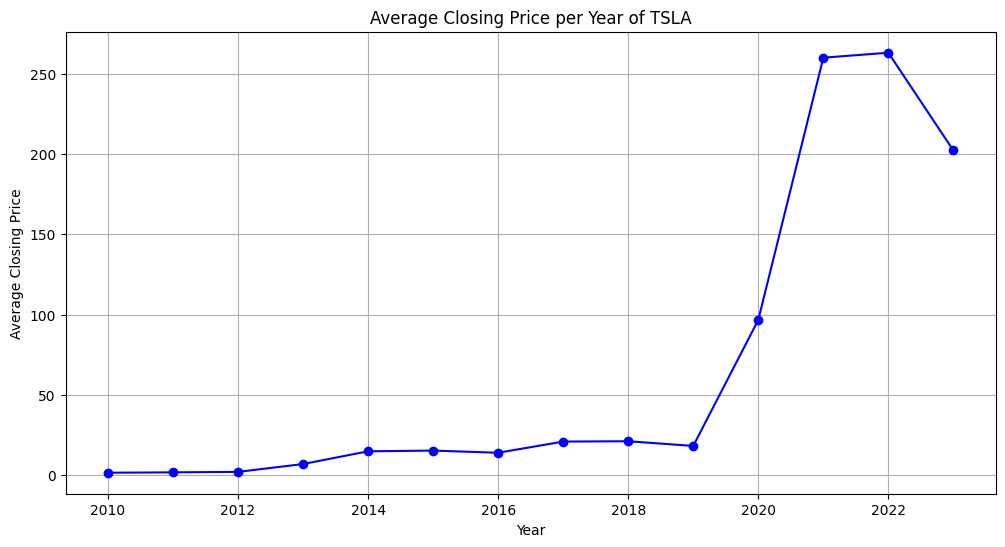

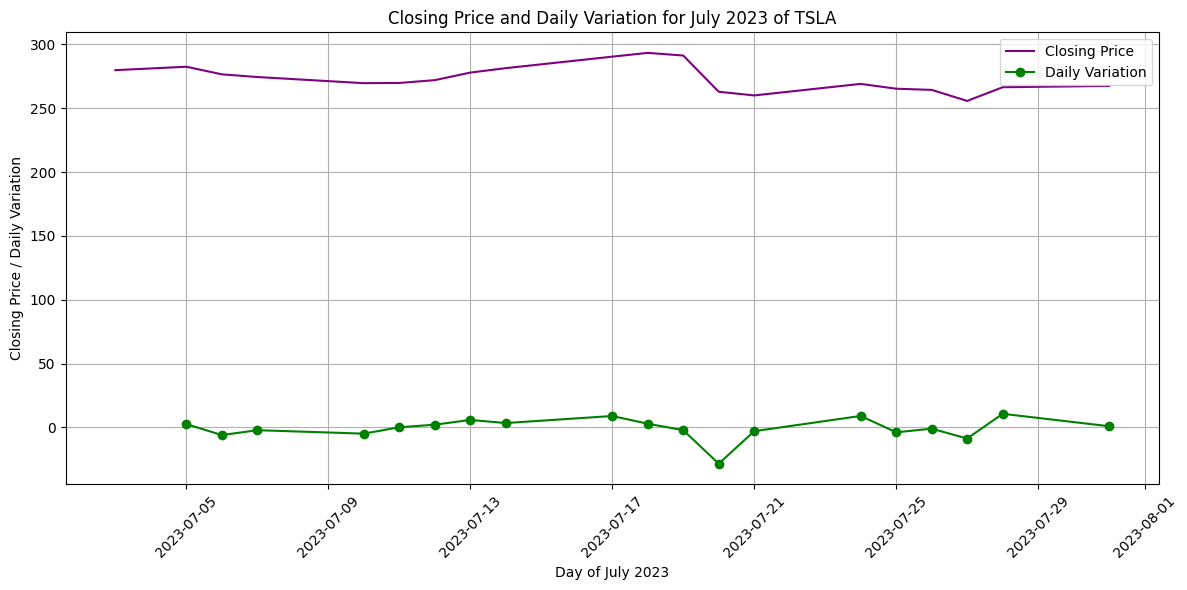

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

# Define the ticker
tsla = "TSLA"
ActionsDF = yf.Ticker(tsla)

# Define the desired end date (August 14, 2023)
end_date = "2023-08-14"

# Retrieve price data
dataDF = ActionsDF.history(period="1d", start='2010-1-1', end=end_date)

# Create a column for the year
dataDF["Year"] = dataDF.index.year

# Create a column for the month
dataDF["Month"] = dataDF.index.month

# Calculate daily variation of the closing price
dataDF["DailyVariation"] = dataDF["Close"].diff()

# Filter data for July 2023
july_data = dataDF[(dataDF["Month"] == 7) & (dataDF["Year"] == 2023)].copy()

# Calculate daily variation for July 2023
july_data["DailyVariation"] = july_data["Close"].diff()

# Plot the first graph (average variation per year)
plt.figure(figsize=(12, 6))
average_variation_by_year = dataDF.groupby("Year")["Close"].mean()
plt.plot(average_variation_by_year.index, average_variation_by_year.values, color='blue', marker='o')
plt.xlabel("Year")
plt.ylabel("Average Closing Price")
plt.title("Average Closing Price per Year of TSLA")
plt.grid(True)
plt.show()

# Plot the second graph (daily closing prices and variations for July 2023)
plt.figure(figsize=(12, 6))
plt.plot(july_data.index, july_data["Close"], color='purple', label='Closing Price')
plt.plot(july_data.index, july_data["DailyVariation"], color='green', marker='o', label='Daily Variation')
plt.xlabel("Day of July 2023")
plt.ylabel("Closing Price / Daily Variation")
plt.title("Closing Price and Daily Variation for July 2023 of TSLA")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


##2.2 ARTICLES FINANIERS

In [ ]:
import pandas as pd

In [ ]:
# Path to the CSV file on Google Drive
csv_path = '/content/drive/MyDrive/Kaggle/Articles_tsla.csv'

# Load the CSV file into a DataFrame
Articles_tsla = pd.read_csv(csv_path)

# Display the first five rows of the loaded DataFrame
Articles_tsla.head()


,Date,Title,Description
0,2023-08-09,Tesla and other top companies capitalize on bi...,"The list includes MicroStrategy, Block, Tesla ..."
1,2023-08-09,The Volvo EX30’s interior is the Ikea take on ...,Comparisons will inevitably be drawn between t...
2,2023-08-09,Tesla Owners Love Their Cars More Than Elon Mu...,(Bloomberg) -- Listen to The Big Take podcast ...
3,2023-08-09,Tesla Semis Shine on PepsiCo's Long-Haul Elect...,PepsiCo is running 21 Tesla Semis up to 450 mi...
4,2023-08-09,"Tesla Reportedly Leases Office Space In India,...","Tesla India Motor & Energy, which is the Ameri..."


Comme le montre les cinq première lignes de notre dataset, il est décrit par trois colonnes:


**- Date:** Cette colonne représente la date à laquelle l'article a été publié. Les dates sont au format "YYYY-MM-DD" pour l'année, le mois et le jour.

**- Title:** Cette colonne contient les titres des articles. Les titres sont des résumés succincts du contenu de l'article et sont généralement conçus pour attirer l'attention du lecteur et communiquer le sujet principal de l'article.

**- Description:** Cette colonne contient des descriptions ou des extraits des articles. Les descriptions fournissent des informations supplémentaires sur le contenu de l'article et peuvent inclure des détails clés, des points saillants ou des points de vue clés.



In [ ]:
# Utilise la méthode describe() pour obtenir des statistiques descriptives sur le DataFrame Arcticles_tsla_Df1.
Articles_tsla.describe()

,Date,Title,Description
count,5245,5245,5243
unique,1509,4844,4954
top,2023-08-09,EV maker Lucid slashes prices of Air sedan as ...,"The battery of an Ontario driver's Tesla died,..."
freq,128,10,32


**- Date :**

- Il y a 5245 dates au total.
- Il y a 1509 dates uniques.
- La date la plus fréquente est "2023-08-09", qui apparaît 128 fois.

**- Title :**

- Il y a 5245 titres au total.
- Il y a 4844 titres uniques.
- Le titre le plus fréquent est "EV maker Lucid slashes prices of Air sedan as ...".

**- Description :**

- Il y a 5243 descriptions au total.
- Il y a 4954 descriptions uniques.
- La description la plus fréquente est "The battery of an Ontario driver's Tesla died,...".


In [ ]:
# Display information about the DataFrame
Articles_tsla.info()

- Pour la colonne **"Date"**, il y a 5245 valeurs non nulles et le type de données est "object" (c'est-à-dire, généralement, une chaîne de caractères).

- Pour la colonne **"Title"**, il y a 5245 valeurs non nulles et le type de données est également "object" (chaîne de caractères).

- Pour la colonne **"Description"**, il y a 5243 valeurs non nulles (il y a donc 2 valeurs manquantes) et le type de données est également "object" (chaîne de caractères).

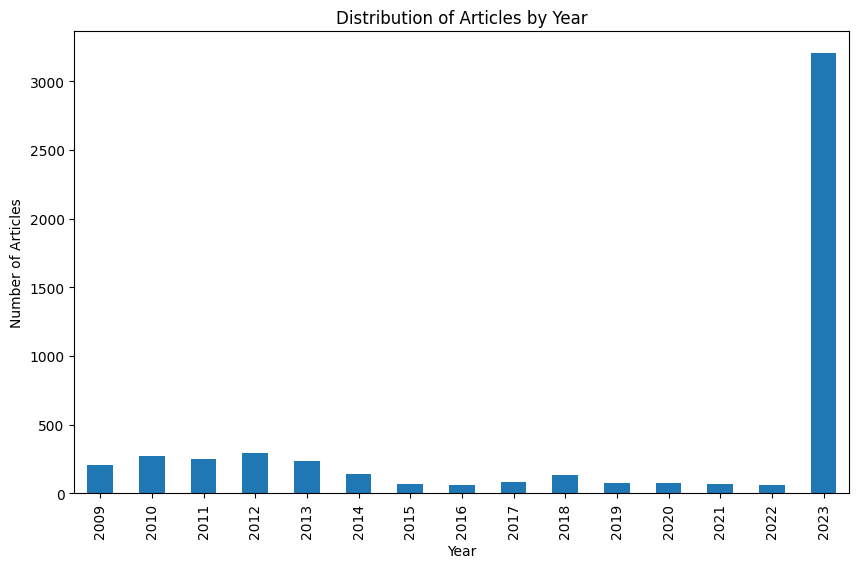

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Convert the 'Date' column to datetime format
Articles_tsla['Date'] = pd.to_datetime(Articles_tsla['Date'])

# Extract the year from the 'Date' column
Articles_tsla['Year'] = Articles_tsla['Date'].dt.year

# Count the number of articles for each year
year_counts = Articles_tsla['Year'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.title('Distribution of Articles by Year')
plt.show()


#3. PRÉ-TRAITEMENT DES DONNÉES

## 3.1 PRIX DES ACTIONS
Nous allons nettoyer notre dataset du prix des actions ,en supprimant  certains champs du dataset pour ne retenir que la date, et le prix de clôture.



In [ ]:
import pandas as pd

# Read the CSV file and specify that the index should be used as a regular column
ActionsDF = pd.read_csv("/content/drive/MyDrive/Kaggle/Actions_tsla.csv", index_col=0)

# Keep only the 'Close' column
ActionsDF = ActionsDF[['Close']]

# Reset the index to make the date column normal again
ActionsDF.reset_index(inplace=True)

# Save the modified DataFrame to a CSV file
ActionsDF.to_csv("/content/drive/MyDrive/Kaggle/Cleaned_Actions_tsla.csv", index=False)

# Display the first few rows of the resulting DataFrame
print(ActionsDF.head())


         Date     Close
0  2010-06-29  1.592667
1  2010-06-30  1.588667
2  2010-07-01  1.464000
3  2010-07-02  1.280000
4  2010-07-06  1.074000


## 3.2 LES ARTICLES FINANCIERS

Pour le nettoyage de notre dataset des articles procedéront par une série d/'opérations:

- Premièrement nous allons supprimer certains champs du dataset pour ne retenir que la date, le titre et le contenu de l’article.

- Ensuite Nous allons maintenant changer le format de la date et supprimer les doublons et les lignes conte-nant des champs vides, et puis finalement la conversion des textes en format minuscule.
- Enfin nous allons procéder à:

  - La suppression des caractères, des liens commençant par https, @, RT...
  - La séparation des éléments de l’article en unités de mots.
  - La suppression des mots qui n’ont aucune influence sur notre analyse (stopwords)
  
  
  
  
  #### Nous avons décidé d'utiliser un modèle pré-entrainé qui incorpore ces étapes déjà.


# Voici le dataset final à utiliser: Articles_tsla

## Dataset: [**Lien**](https://drive.google.com/drive/folders/1LCZ0nrDFA0A6iHuV_2drAVxz7w35lkzt?usp=sharing)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 #Charger le dataset
 path="/content/drive/MyDrive/Kaggle/Articles_tsla.csv"
#path="/content/Articles_tsla.csv"
Articles_tsla=pd.read_csv(path)
 #Afficher les cinq premières lignes
print(Articles_tsla.shape)
Articles_tsla.head()

(5245, 3)


,Date,Title,Description
0,2023-08-09,Tesla and other top companies capitalize on bi...,"The list includes MicroStrategy, Block, Tesla ..."
1,2023-08-09,The Volvo EX30’s interior is the Ikea take on ...,Comparisons will inevitably be drawn between t...
2,2023-08-09,Tesla Owners Love Their Cars More Than Elon Mu...,(Bloomberg) -- Listen to The Big Take podcast ...
3,2023-08-09,Tesla Semis Shine on PepsiCo's Long-Haul Elect...,PepsiCo is running 21 Tesla Semis up to 450 mi...
4,2023-08-09,"Tesla Reportedly Leases Office Space In India,...","Tesla India Motor & Energy, which is the Ameri..."


### Nous allons par la suite filtrer le dataset pour ne retenir que les articles qu'á partir   de cette date : 2010-06-29 afin de correspondre temporellement aux données des actions.

In [ ]:
import pandas as pd
import re

# Charger votre dataset depuis un fichier CSV
path = "/content/drive/MyDrive/Kaggle/Articles_tsla.csv"
Articles_tsla = pd.read_csv(path)

def clean_text(text):
    if isinstance(text, str):
        # Supprimer les caractères spéciaux
        cleaned_text = re.sub(r'[^\w\s]', ' ', text)

        # Supprimer les espaces supplémentaires
        cleaned_text = re.sub(r'\s+', ' ', cleaned_text).strip()

        return cleaned_text
    else:
        return ''  # Retourner une chaîne vide pour les valeurs non valides

# Appliquer la fonction de nettoyage aux colonnes Title et Description
Articles_tsla['Title'] = Articles_tsla['Title'].apply(clean_text)
Articles_tsla['Description'] = Articles_tsla['Description'].apply(clean_text)

# Convertir la colonne de dates en format datetime
Articles_tsla['Date'] = pd.to_datetime(Articles_tsla['Date'])

# Filtrer les articles à partir de la date '2010-06-29'
start_date = '2010-06-29'
Filtered_articles = Articles_tsla[Articles_tsla['Date'] >= start_date]

# Chemin d'accès pour le fichier CSV filtré
filtered_csv_path = '/content/drive/MyDrive/Kaggle/Filtered_Articles_tsla.csv'

# Sauvegarder les articles filtrés dans un fichier CSV
Filtered_articles.to_csv(filtered_csv_path, index=False)

print(f"Articles filtrés sauvegardés dans '{filtered_csv_path}'.")


Articles filtrés sauvegardés dans '/content/drive/MyDrive/Kaggle/Filtered_Articles_tsla.csv'.


In [ ]:
# Trier le DataFrame par la colonne de dates
Articles_tsla_sorted = Filtered_articles.sort_values(by='Date')

# Afficher les cinq premières lignes du DataFrame trié
print(Filtered_articles.shape)
Articles_tsla_sorted.head()

(4909, 3)


,Date,Title,Description
1851,2010-06-29,Tesla IPO Shares Pop Drop And Rally Market Val...,But Tesla shares are rallying after an initial...
1852,2010-06-29,Tesla IPO Raises 226 1M Stock Surges 41 Percent,Tesla Motors raised 226 1 million dollars in a...
1853,2010-06-29,Tesla geht an die Börse Fliegender Start Geld,Erster Börsengang eines US Autoherstellers sei...
1855,2010-06-29,Tesla Motors IPO a win but road ahead is bumpy,But Tesla s ability to navigate the still deve...
1856,2010-06-29,Tesla Börsengang Elektroauto Hype erreicht die...,Die Wall Street glaubt fest an die Zukunft des...


#3. ANALYSE DES SENTIMENTS

Dans cette section, nous allons passer à un point crucial dans notre projet qui est l’analyse de sentiment. Elle consiste à detecter l’émotion derrière une publication (article) qui peut être : positif, négatif ou neutre en attribuant un score. Dans notre cas ici, nous  utilisons  le modèle RoBERTa pré-entraîné pour effectuer une analyse de sentiment sur les titres et les descriptions des articles de Tesla.

In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 95.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.3 MB/s eta 0:00:00


In [ ]:
#Charger la dataset néttoyée du prix d'action
import pandas as pd
path="/content/drive/MyDrive/Kaggle/Filtered_Articles_tsla.csv"
#path="/content/Filtered_Articles_tsla.csv"
data=pd.read_csv(path)
 #Afficher les cinq premières lignes
data.shape

(4909, 3)

In [ ]:
print(data["Description"].iloc[0],"\n")
print(data["Description"].iloc[2],"\n")
print(data["Description"].iloc[19],"\n")

The list includes MicroStrategy Block Tesla NASDAQ TSLA and other moguls that keep investing in crypto despite the bear market Top 5 companies holding 

Bloomberg Listen to The Big Take podcast on iHeart Apple Podcasts Spotify Terminal When Tesla built the Model 3 the first electric car for the 

Lucid s Air Sapphire EV Is Terrifying Quick Lucid is justifying its EV s eye watering price tag with acceleration that tops Tesla s Model S Plaid by James 



In [ ]:
import torch
import pandas as pd
from transformers import (
    pipeline,
    AutoTokenizer,
    AutoModelForSequenceClassification
)

def process_and_analyze_sentiments(df):
    # Set device to GPU if available
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

    model_id = "cardiffnlp/twitter-roberta-base-sentiment"

    # Load the model from huggingface
    model = AutoModelForSequenceClassification.from_pretrained(
        model_id,
        num_labels=3
    )

    # Load the tokenizer from huggingface
    tokenizer = AutoTokenizer.from_pretrained(model_id)

    # Load the tokenizer and model into a sentiment analysis pipeline
    nlp = pipeline(
        "sentiment-analysis",
        model=model,
        tokenizer=tokenizer,
        device=device
    )

    labels = {
        "LABEL_0": "negative",
        "LABEL_1": "neutral",
        "LABEL_2": "positive"
    }

    def get_sentiment(reviews):
        reviews = str(reviews)
        sentiments = nlp(reviews)
        sentiment_label = labels[sentiments[0]["label"]]
        sentiment_score = sentiments[0]["score"]

        # Map sentiment label to score between -1 and 1
        if sentiment_label == "negative":
            sentiment_score = -sentiment_score  # Invert score for negative sentiment
        elif sentiment_label == "neutral":
            sentiment_score = 0.01 if sentiment_score > 0.6 else -0.01  # Slightly positive/negative for neutral sentiment
        else:
            sentiment_score = sentiment_score  # Positive sentiment score remains as-is


        return sentiment_label, sentiment_score

    date_format = "%Y-%m-%d"
    df['Date'] = pd.to_datetime(df['Date'], format=date_format)
    df = df.sort_values(by='Date')
    df[['label_description', 'score_description']] = df['Description'].apply(lambda x: pd.Series(get_sentiment(x)))
    df[['label_title', 'score_title']] = df['Title'].apply(lambda x: pd.Series(get_sentiment(x)))

    # Define a lambda function to calculate both most frequent label values and mean scores
    def calculate_metrics(x):
        return pd.Series({
            'most_frequent_label_description': x['label_description'].value_counts().idxmax(),
            'most_frequent_label_title': x['label_title'].value_counts().idxmax(),
            'mean_score_description': x['score_description'].mean(),
            'mean_score_title': x['score_title'].mean()
        })

    # Group by 'Date' and apply the lambda function
    result = df.groupby('Date').apply(calculate_metrics)
    return result

# Apply the combined function
sentiment_df = process_and_analyze_sentiments(data)


sentiment_df

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


,most_frequent_label_description,most_frequent_label_title,mean_score_description,mean_score_title
Date,,,,
2010-06-29,neutral,neutral,0.370267,0.163568
2010-07-01,positive,neutral,0.547189,0.023883
2010-07-02,neutral,neutral,0.292232,0.010000
2010-07-03,neutral,neutral,-0.010000,0.010000
2010-07-04,positive,neutral,0.701779,0.010000
...,...,...,...,...
2023-08-10,neutral,neutral,0.115523,0.057121
2023-08-11,neutral,neutral,0.232581,-0.026075
2023-08-12,neutral,neutral,0.148685,0.020979


In [ ]:
sentiment_df.shape


(1315, 5)

In [ ]:
sentiment_df.columns

Index(['most_frequent_label_description', 'most_frequent_label_title',
       'mean_score_description', 'mean_score_title'],
      dtype='object')

In [ ]:
# Chemin vers le fichier CSV sur Google Drive
output_path = "/content/drive/MyDrive/Kaggle/Sentiment_Result.csv"

# Transformez les index en colonne "Date"
sentiment_df.reset_index(inplace=True)

# Renommez la colonne "mean_score_description" en "Mean_score_description"
sentiment_df.rename(columns={"mean_score_description": "Mean_score_description"}, inplace=True)

# Créez le nouveau DataFrame Sentiment_Result en supprimant les colonnes spécifiées
Sentiment_Result = sentiment_df.drop(['most_frequent_label_description', 'most_frequent_label_title', 'mean_score_title'], axis=1)

# Sauvegardez le DataFrame Sentiment_Result dans un fichier CSV
Sentiment_Result.to_csv(output_path, index=False)

# Affichez un message indiquant que le fichier a été sauvegardé
print("Le fichier CSV a été sauvegardé avec succès.")


Le fichier CSV a été sauvegardé avec succès.


#### 3.1 ASSOCIANTION TEMPORELLE  DE LA DATASET DE L'ANALYSE DES SENTIMENTS AVEC LE PRIX DES ACTIONS

In [ ]:
#Charger la dataset néttoyée du prix d'action
path="/content/drive/MyDrive/Kaggle/Cleaned_Actions_tsla.csv"
Actions_df=pd.read_csv(path)
 #Afficher les cinq premières lignes
print(Actions_df.shape)
Actions_df.head()

(3303, 2)


,Date,Close
0,2010-06-29,1.592667
1,2010-06-30,1.588667
2,2010-07-01,1.464000
3,2010-07-02,1.280000
4,2010-07-06,1.074000


In [ ]:
import pandas as pd
Sentiment_Result=pd.read_csv("/content/drive/MyDrive/Kaggle/Sentiment_Result.csv")
print(Sentiment_Result.shape)
Sentiment_Result.head()


(1315, 2)


,Date,Mean_score_description
0,2010-06-29,0.370267
1,2010-07-01,0.547189
2,2010-07-02,0.292232
3,2010-07-03,-0.010000
4,2010-07-04,0.701779


In [ ]:
# Fusionner les DataFrames en utilisant la colonne "Date" comme clé
Final_dataset = pd.merge(Sentiment_Result, Actions_df, on="Date", how="inner")
# Enregistrer le DataFrame fusionné dans un fichier CSV
Final_dataset.to_csv("/content/drive/MyDrive/Kaggle/Final_dataset.csv", index=False)

In [ ]:
Final_dataset.head(10)

,Date,Mean_score_description,Close
0,2010-06-29,0.370267,1.592667
1,2010-07-01,0.547189,1.464000
2,2010-07-02,0.292232,1.280000
3,2010-07-06,0.141231,1.074000
4,2010-07-07,0.372400,1.053333
5,2010-07-08,-0.765309,1.164000
6,2010-07-09,0.546139,1.160000
7,2010-07-13,0.010000,1.209333
8,2010-07-14,0.010000,1.322667
9,2010-07-15,-0.010000,1.326000


### 3-2 MÉSURE DE CORRÉLATION ENTRE LE PRIX DE CLÔTURE DES ACTIONS ET LE SENTIMENT DES ARTICLES

In [ ]:
import pandas as pd
Final_dataset=pd.read_csv("/content/drive/MyDrive/Kaggle/Final_dataset.csv")

# Liste des jours précédents pour lesquels vous souhaitez calculer la corrélation
days_previous = [1, 2, 5, 10, 15, 20, 30, 60]

# Calculer les coefficients de corrélation entre les scores de sentiment moyen et le prix de clôture pour chaque plage de jours précédents
correlation_results = {}
for days in days_previous:
    Final_dataset[f"Mean_score_{days}_days"] = Final_dataset["Mean_score_description"].shift(days)
    correlation_score_close = Final_dataset[f"Mean_score_{days}_days"].corr(Final_dataset["Close"])
    correlation_results[f"{days}_days"] = correlation_score_close

# Afficher les résultats de corrélation
for days, correlation in correlation_results.items():
    print(f"Corrélation entre le sentiment des articles {days} jours précédents et le prix de clôture : {correlation}")


Corrélation entre le sentiment des articles 1_days jours précédents et le prix de clôture : -0.046986000266527286
Corrélation entre le sentiment des articles 2_days jours précédents et le prix de clôture : -0.04604598158498611
Corrélation entre le sentiment des articles 5_days jours précédents et le prix de clôture : -0.0406651079076701
Corrélation entre le sentiment des articles 10_days jours précédents et le prix de clôture : -0.044067444246119976
Corrélation entre le sentiment des articles 15_days jours précédents et le prix de clôture : -0.04459248053843046
Corrélation entre le sentiment des articles 20_days jours précédents et le prix de clôture : -0.054260667786873856
Corrélation entre le sentiment des articles 30_days jours précédents et le prix de clôture : -0.06232228634085969
Corrélation entre le sentiment des articles 60_days jours précédents et le prix de clôture : -0.014902222176361278


#4. Modèle prédictif

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Charger le fichier CSV depuis le chemin donné
drive_path = "/content/drive/MyDrive/Kaggle/Final_dataset.csv"
final_data = pd.read_csv(drive_path)

# Convertir la colonne de date en type datetime
final_data['Date'] = pd.to_datetime(final_data['Date'])

# Calculer le nombre de jours écoulés depuis la date de référence
reference_date = final_data['Date'].min()
final_data['DaysSinceReference'] = (final_data['Date'] - reference_date).dt.days

# Diviser les données en fonctionnalités (X) et cible (y)
X = final_data.drop(['Close', 'Date'], axis=1)  # Ne pas inclure la colonne Date
y = final_data['Close']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paramètres à tester dans la recherche de grille
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialiser le modèle RandomForestRegressor
base_model = RandomForestRegressor(random_state=42)

# Initialiser la recherche de grille
grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=3)

# Effectuer la recherche de grille sur l'ensemble d'entraînement
grid_search.fit(X_train, y_train)

# Obtenir le meilleur modèle trouvé par la recherche de grille
best_model = grid_search.best_estimator_

# Faire des prédictions sur l'ensemble de test avec le meilleur modèle
y_pred_best = best_model.predict(X_test)

# Calculate metrics
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
score_best = best_model.score(X_test, y_test)  # Calculate the R-squared score

print("RMSE with best model:", rmse_best)
print("MAE with best model:", mae_best)
print("R-squared with best model:", r2_best)
print("Model score (R-squared) with best model:", score_best)

RMSE with best model: 6.945308246627514
MAE with best model: 2.789517158532191
R-squared with best model: 0.9939381409140781
Model score (R-squared) with best model: 0.9939381409140781


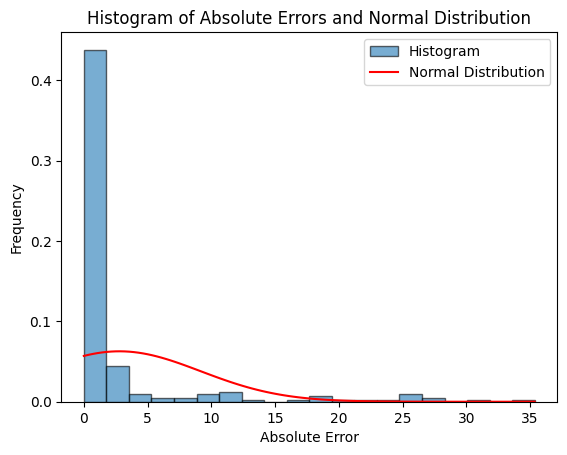

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
# Calculate the absolute difference between predicted and actual values
hist_error = np.abs(y_pred_best - y_test)
# Plot the histogram of absolute errors
plt.hist(hist_error, bins=20, edgecolor='black', density=True, alpha=0.6, label='Histogram')

# Fit a normal distribution to the data
mu, sigma = stats.norm.fit(hist_error)
x = np.linspace(min(hist_error), max(hist_error), 100)
pdf = stats.norm.pdf(x, mu, sigma)
plt.plot(x, pdf, 'r', label='Normal Distribution')

plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.title('Histogram of Absolute Errors and Normal Distribution')
plt.legend()
plt.show()



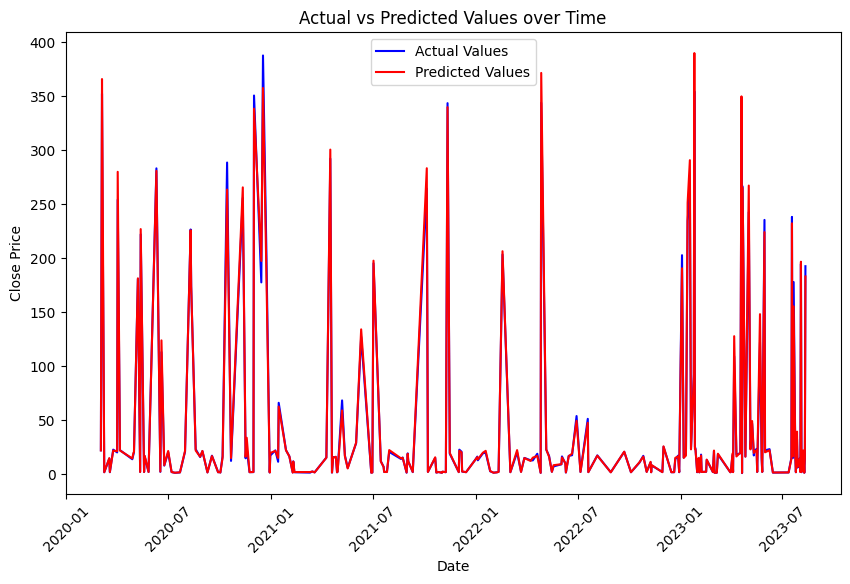

In [ ]:
import matplotlib.pyplot as plt

# Plot the actual and predicted values over time
plt.figure(figsize=(10, 6))
plt.plot(final_data['Date'].iloc[-len(y_test):], y_test, label='Actual Values', color='blue')
plt.plot(final_data['Date'].iloc[-len(y_test):], y_pred_best, label='Predicted Values', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Values over Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()


#5.  Passage en temps réel: Apache Kafka

In [1]:
!pip install confluent-kafka


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 21.4 MB/s eta 0:00:00


In [3]:
from confluent_kafka import Producer

conf = {
    'bootstrap.servers': 'pkc-lzvrd.us-west4.gcp.confluent.cloud:9092',
    'security.protocol': 'SASL_SSL',
    'sasl.mechanisms': 'PLAIN',
    'sasl.username': '7EEPKRB4LLGJOBSC',
    'sasl.password': '0/+d2Vi9vcZOh4g/LJJm4MHs+L6zOt+00LPhiMcTTyjdML5IGP9Wg5Q7aUeWXv2Y'
}

producer = Producer(conf)

# Produce a sample message to the Kafka topic
producer.produce('Tesla', key='sample-key', value='Hello, Kafka!')

# Wait for any outstanding messages to be delivered and delivery reports received
producer.flush()


0